In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score

from matplotlib.pylab import plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [3]:
df.sample(10)

,rating,sentiment,total_people,running_time,year,a_number,a_comment,a_forward,a_like,b_number,...,genre_喜剧,genre_奇幻,genre_家庭,genre_悬疑,genre_惊悚,genre_战争,genre_歌舞,genre_爱情,genre_科幻,genre_纪录片
144,3.7,0.013016,8575,90,2012,59.0,319.0,276.0,887.0,-6.0,...,1,0,0,0,0,0,0,0,0,0
413,7.0,1.000000,3081,109,2014,5.0,551.0,450.0,1280.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
38,8.3,1.000000,97,130,2014,834.0,1831.0,564.0,1644.0,-154.0,...,0,0,0,0,0,0,0,0,0,0
313,3.2,0.007643,216,93,2014,40.0,667.0,2092.0,2944.0,-7.0,...,0,0,0,1,0,0,0,0,0,0
409,6.1,1.000000,42330,92,2012,834.0,196472.0,56734.0,105609.0,-75.0,...,0,0,0,0,0,0,0,0,0,0
165,3.2,0.268910,718,87,2015,772.0,1289.0,2601.0,3342.0,-350.0,...,0,0,0,1,0,0,0,0,0,0
147,6.5,1.000000,17945,126,2015,658.0,3249.0,8139.0,20238.0,-361.0,...,0,0,0,0,0,0,0,0,0,0
6,8.2,1.000000,44922,131,2014,38.0,9909.0,14653.0,6573.0,-25.0,...,0,0,0,0,0,0,0,0,0,0
88,6.1,1.000000,75421,84,2012,893.0,2608.0,4166.0,9058.0,2.0,...,0,0,0,0,0,0,0,0,0,0
139,6.8,1.000000,51,103,2011,848.0,1227.0,778.0,118402.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features = df.columns

train_features = []
for x in features:
    if x != 'boxing':
        train_features.append(x)
predict_features = ['boxing']

In [5]:
model = linear_model.Ridge()

Ridgescores = cross_val_score(
            model, df[train_features], 
            df[predict_features], 
            cv=10,
            scoring='neg_median_absolute_error'
)

In [6]:
model = linear_model.ElasticNet()

ElasticNetscores = cross_val_score(
            model, df[train_features], 
            df[predict_features], 
            cv=10,
            scoring='neg_median_absolute_error'
)

In [7]:
model = linear_model.Lasso()

Lassoscores = cross_val_score(
            model, df[train_features], 
            df[predict_features], 
            cv=10,
            scoring='neg_median_absolute_error'
)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279751177.9299145, tolerance: 13569588.82450066
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1537328684.9985454, tolerance: 16575038.074909294
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1585469638.9203765, tolerance: 17049144.92060929
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1528848993.4

In [8]:
model = linear_model.HuberRegressor()

HuberRegressorscores = cross_val_score(
            model, df[train_features], 
            df[predict_features], 
            cv=10,
            scoring='neg_median_absolute_error'
)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [9]:
model = ensemble.AdaBoostRegressor()

AdaBoostscores = cross_val_score(
            model, df[train_features], 
            df[predict_features], 
            cv=10,
            scoring='neg_median_absolute_error'
)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [10]:
model = ensemble.GradientBoostingRegressor()

GradientBoostingscores = cross_val_score(
            model, df[train_features], 
            df[predict_features], 
            cv=10,
            scoring='neg_median_absolute_error'
)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [11]:
model = ensemble.RandomForestRegressor()

RandomForestscores = cross_val_score(
            model, df[train_features], 
            df[predict_features], 
            cv=10,
            scoring='neg_median_absolute_error'
)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

In [12]:
model = svm.SVR()

SVRscores = cross_val_score(
            model, df[train_features], 
            df[predict_features], 
            cv=10,
            scoring='neg_median_absolute_error'
)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

In [13]:
model = svm.LinearSVR()

LinearSVRscores = cross_val_score(
            model, df[train_features], 
            df[predict_features], 
            cv=10,
            scoring='neg_median_absolute_error'
)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataCo

In [20]:
model = linear_model.LinearRegression()

Linearscores = cross_val_score(
            model, df[train_features], 
            df[predict_features], 
            cv=10,
            scoring='neg_median_absolute_error'
)

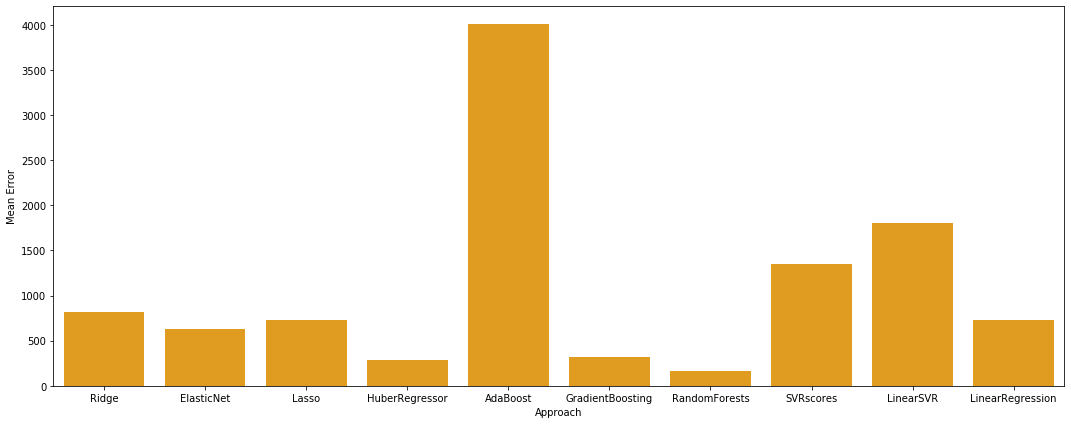

In [21]:
ig, ax = plt.subplots(figsize=(15, 6))

error_scores = np.array([
    -Ridgescores.mean(), -ElasticNetscores.mean(), 
    -Lassoscores.mean(), -HuberRegressorscores.mean(), -AdaBoostscores.mean(), 
    -GradientBoostingscores.mean(), -RandomForestscores.mean(), -SVRscores.mean(), 
    -LinearSVRscores.mean(), -Linearscores.mean()
])

sns.barplot(
    ['Ridge', 'ElasticNet', 'Lasso', 'HuberRegressor', 'AdaBoost', 
     'GradientBoosting','RandomForests', 'SVRscores', 'LinearSVR', 'LinearRegression'],
    error_scores, color='orange', ax=ax)

ax.set_xlabel('Approach')
ax.set_ylabel('Mean Error')
plt.tight_layout()

In [22]:
test = df.iloc[[len(df)-1]]    
training = df.iloc[:len(df)-1] 

model = ensemble.RandomForestRegressor().fit(training[train_features], training[predict_features])
model.predict(test[train_features]), test[predict_features]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eloise/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


(array([44532.14]),       boxing
 418  54011.0)

In [23]:
test = df.iloc[[len(df)-1]]    
training = df.iloc[:len(df)-1] 

model = ensemble.RandomForestRegressor().fit(training[train_features], training[predict_features])
model.predict(test[train_features]), test[predict_features]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eloise/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


(array([50584.57]),       boxing
 418  54011.0)